## **Tugas Pemodelan dan Simulasi**

Nama : Semayatri F. Tunliu

NPM  : 22271065704

Prodi : Teknik Informatika


# Logistic Regression

Dataset berisi 8 kolom atribut dan 1 kolom label yang berisi 2 kelas yaitu 1 dan 0. Angka 1 menandakan bahwa orang tersebut positif diabetes dan 0 menandakan sebaliknya. Terdapat 768 sampel yang merupakan 768 pasien perempuan keturunan suku Indian Pima.

Model machine learning yang akan kita buat bertujuan untuk mengklasifikasikan apakah seorang pasien positif diabetes atau tidak

Tahapan latihan kali ini adalah:

1. Import data dan ubah data ke dalam Dataframe.
2. Bagi dataset.
3. Melakukan standarisasi.
4. Membuat dan melatih model.
5. Evaluasi model.

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/sample_data/diabetes.csv')


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#mengecek nilai yang missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Replace nilai Nol
import numpy as np
zero_not_allowed = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']

for column in zero_not_allowed:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column]= df[column].replace(np.NaN, mean)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression() #membuat sebuah objek logistic regression.
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.7532467532467533

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 29],
       [15, 40]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



# k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
# Define the model --> K-NN, value K got from square root leng y_test, K=11
classifire = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

In [ ]:
#fit model
classifire.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Tes hasil Predikksi
y_pred = classifire.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cm

array([[81, 18],
       [20, 35]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.7402597402597403


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 29],
       [15, 40]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
clf.score(X_train, y_train)


0.8045602605863192

In [ ]:
y_pred= clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7142857142857143

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70, 29],
       [15, 40]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



Dapat diambil kesimpulan dari Evaluasi Model:

### Visualize Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Implementasi decision tree menggunakan scikit-learn

model = DecisionTreeClassifier(criterion = "gini", max_depth = 10)
model = model.fit(X_train, y_train)

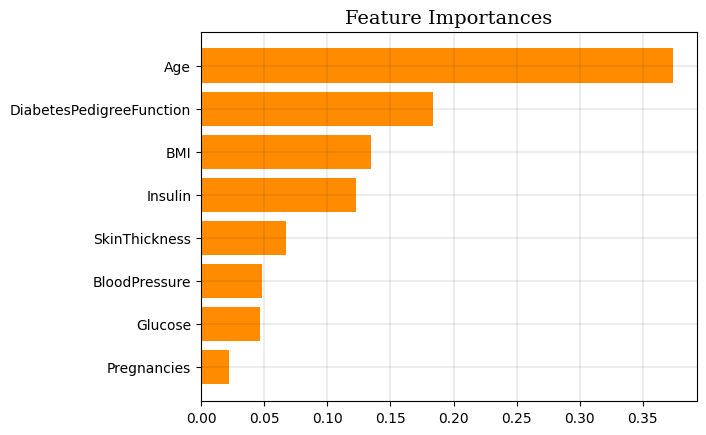

In [ ]:
# Identifikasi feature
import matplotlib.pyplot as plt
importance = model.feature_importances_
indices = np.argsort(importance)

importance_plt = plt.barh(list(df.columns[: -1]), importance[indices], color = "darkorange")
importance_plt = plt.title("Feature Importances", fontsize = 14, fontfamily = "serif")
importance_plt = plt.grid(color='black', linewidth=0.1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df['Age']
y = df['DiabetesPedigreeFunction']
X = X[:,np.newaxis]

<ipython-input-67-7324a49b1a46>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


In [ ]:
from sklearn.svm import SVR
model  = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X,y)

SVR(C=1000, gamma=0.05)

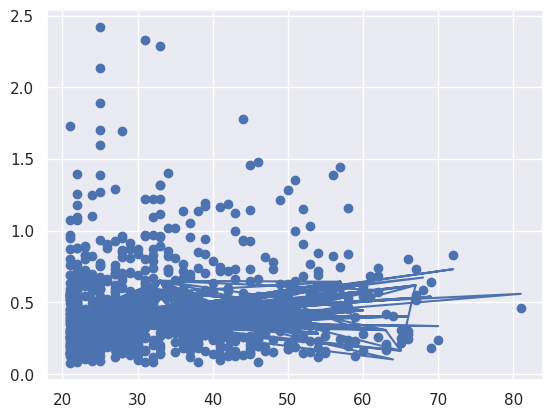

In [ ]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))

Dapat dilihat kecendurangan umur yang menyebabkan seseorang bisa terkena diabetes adalah kisaran 20 - 50 tahun.
Umur seseorang dapat mempengaruhi kecenderungan untuk pasien memiliki diabetes.
